## A. Pengenalan

### Final Project 2
=== program Python for Data science Hacktiv8 x Kampus Merdeka, Kelompok 4 kelas KS18 ===
- Achmad Dhiaulhaq (PYTN-KS18-019)
- Dizqy Hidayat DM (PYTN-KS18-020)
- Naufal Fakhry Pratama (PYTN-KS18-014)

### Project overview :

- Latar belakang pemilihan kasus : 
dalam project ini pemilihan kasus didasari oleh penerapan pembalajaran yang sudah dipelajari pada program Python for Data Science Hacktiv8, untuk final project 2 yang ingin digapai adalah penerapan pembelajaran konsep Logistic Regression dan Support Vector Machine (SVM).
- Dataset yang digunakan :
Sesuai intruksi dari program python for data science dari Hacktiv8 x Kampus Merdeka, untuk final project 2 menggunakan dataset yang sudah disediakan yaitu data "Rain in Australia" dari website kagle dengan link (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package). Data yang tersedia berukuran 14.09 MB dan berbentuk CSV yang mencakup 23 Kolom dan 145460 baris untuk isinya, Kumpulan data ini berisi pengamatan cuaca harian selama sekitar 10 tahun dari banyak lokasi di seluruh Australia..

- Objective yang ingin dicapai :
    - Memahami konsep Logistic Regression dan Support Vector Machine (SVM).
    - Mampu mempersiapkan data untuk digunakan pada model Logistic Regression dan SVM.
    - Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.


- Hasil yang diharapkan :
    - Model dapat memprediksi perkiraan hujan menggunakan konsep Logistic Regression dan Support Vector Machine (SVM).


## B. Import pustaka yang dibutuhkan

tahap ini dilakukan pengimportan library yang dibutuhkan seperti pandas,numpy,Sklearn, dan lainnya.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error, confusion_matrix,accuracy_score
from scipy.stats.mstats import winsorize
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


from imblearn.over_sampling import SMOTE

import joblib
import pickle




# pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('display.max_columns', None)

## C. Data Loading

Data loading merupakan proses memuat dataset kedalam notebook untuk dilakukan analisa dan develop machine learning

In [2]:
# loading data berbentuk csv dengan menggunakan pandas dan dimasukkan kedalam DataFrame
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Menampilkan informasi jumlah kolom dan baris dari dataset
df.shape

(145460, 23)

In [5]:
# menampilkan stastistik deskriptif dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
#menampilkan stastistik deskriptif untuk kolom-kolom yang bertipe data object atau string

df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


## D. Data Cleaning

Data Cleaning dilakukan untuk membersihkan dan mempersiapkan data sehingga dapat diolah dengan benar dalam analisis data. Proses ini melibatkan identifikasi, penanganan, dan perbaikan masalah atau ketidaksesuaian dalam data yang dapat mempengaruhi hasil analisis.

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### D.1 Handling Missing Value dan Duplicate Data

missing value merupakan data yang hilang dan harus diidentifikasi untuk penanganannya. 
begitu juga data yang duplikat harus dilakukan penanganan berupa penghapusan data yang terduplikasi.

- Handling Duplicate Data

In [8]:
#cek duplikat data

df.duplicated().sum()

0

pada dataset yang ada tidak terdeteksi data yang terduplikasi, maka dari itu kita dapat melanjutkannya ke bagian handling missing value

- Handling Missing Value

In [9]:
#cek missing value dari dataset
pd.DataFrame(df.isna().sum())

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [10]:
# Menghitung persentase missing value untuk setiap kolom
percentage_missing_per_column = (df.isnull().sum() / len(df)) * 100

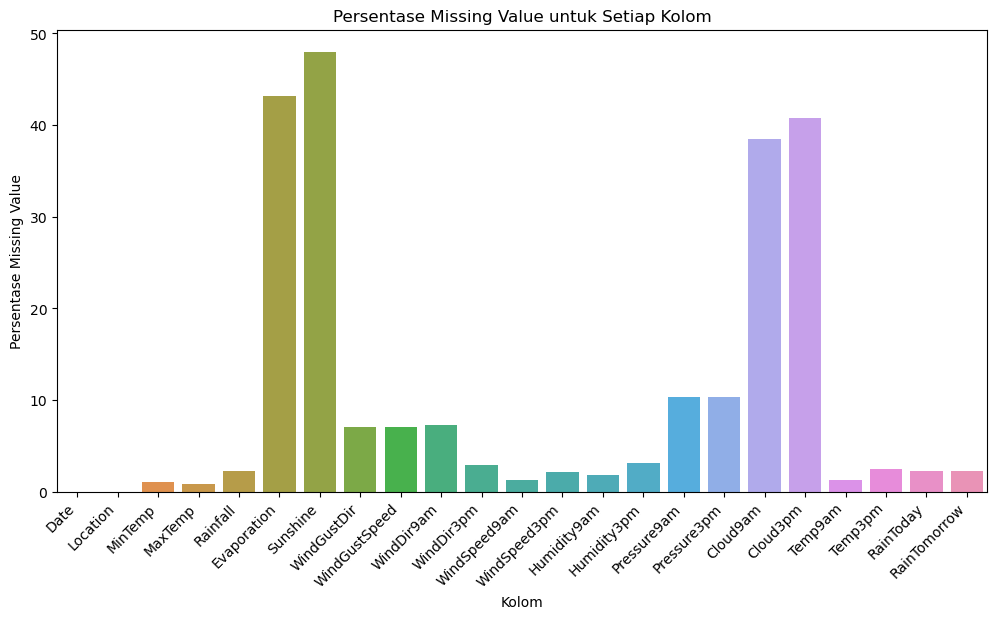

In [11]:
# Visualisasi persentase missing value untuk setiap kolom
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_missing_per_column.index, y=percentage_missing_per_column)
plt.title('Persentase Missing Value untuk Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing Value')
plt.xticks(rotation=45, ha='right')
plt.show()

dari visualisasi data diatas didapati bahwa beberapa kolom memiliki tingkat "missing value" yang sangat tinggi kolom 'Evaporation','sunshine','Cloud9am', dan 'Cloud3pm' memiliki data bernilai kosong yang mencapai lebih dari 30%, dan kolom lainnya terdapat beberapa missing value dibawah 15% dan ada 2 kolom yaitu kolom 'date' dan 'location' yang tidak memiliki nilai kosong. maka dari itu penanganan yang akan dilakukan adalah :

- menghapus kolom yang memiliki missing value diatas 30%
- mengisi kolom yang memiliki missing value dibawah 15%
- missing value pada kolom 'RainTommorow' akan dihapus karena kolom 'RainTommorow' adalah target untuk prediksi dari model yang akan dibangun

In [12]:
# menghapus kolom yang memiliki missing value diatas 30%
threshold = 30
for column in df.columns:
    if (df[column].isna().sum() / len(df) * 100) > threshold:
        df.drop(column, axis=1, inplace=True)

# menghapus missing value pada kolom 'RainTommorow'

df = df.dropna(subset=['RainTomorrow'])

In [13]:
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
63723,2016-03-15,Sale,16.3,20.3,0.6,ESE,54.0,ESE,ESE,30.0,31.0,79.0,86.0,1024.2,1023.6,18.4,18.1,No,Yes
102646,2009-04-04,Nuriootpa,10.1,20.2,0.0,WSW,31.0,SW,SW,6.0,11.0,61.0,38.0,1026.7,1024.8,13.4,18.4,No,No
78375,2010-01-22,Watsonia,17.7,36.8,0.0,SSW,59.0,NE,NNW,9.0,9.0,56.0,21.0,1004.8,1003.2,23.8,33.8,No,No


In [14]:
after_delete_missing_30 = df.isna().sum() / len(df) * 100

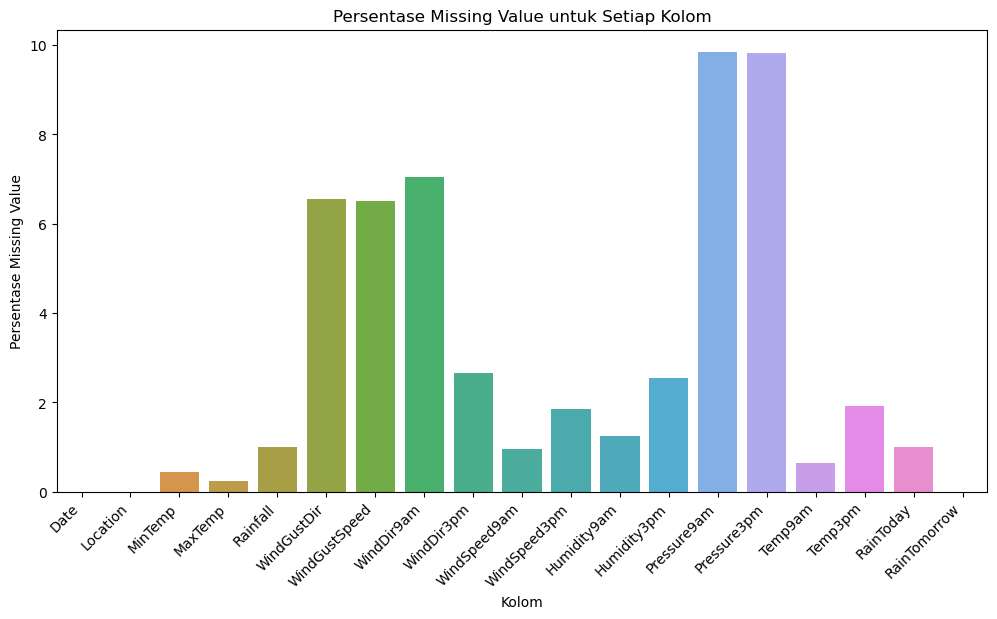

In [15]:
# Visualisasi persentase missing value untuk setiap kolom
plt.figure(figsize=(12, 6))
sns.barplot(x=after_delete_missing_30.index, y=after_delete_missing_30)
plt.title('Persentase Missing Value untuk Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing Value')
plt.xticks(rotation=45, ha='right')
plt.show()

Proses selanjutnya melibatkan pengisian nilai kosong atau missing value dengan kriteria berikut:

- Untuk data kategorikal, nilai modus dari masing-masing kolom akan digunakan untuk mengisi missing value.
- Sedangkan untuk data numerik, nilai mean dari masing-masing kolom akan digunakan untuk mengisi missing value.

In [16]:
# Data Kategorikal

categorical_df = df.select_dtypes('object').columns
categorical_df

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
# Ambil kolom-kolom kategorikal
fill_categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Iterasi melalui setiap kolom kategorikal dan mengisi missing value dengan modus
for column in fill_categorical_columns:
    if column in df.columns:  # Memastikan kolom tersebut ada dalam DataFrame
        mode_value = df[column].mode()[0]  # Mengambil nilai modus
        df[column].fillna(mode_value, inplace=True)

# Periksa apakah ada lagi missing value setelah pengisian
df.isnull().sum()



C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\2115312183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_value, inplace=True)
C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\2115312183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mode_value, inplace=True)
C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\2115312183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].f

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

#### - setelah categorical selanjutnya adalah kolom numerik yang akan diisi dengan nilai mean

In [18]:
numerical_df = df.select_dtypes('float64').columns
numerical_df  

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [19]:
# Ambil kolom-kolom numerik
fill_numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm']

# mengisi missing value dengan mean
for column in fill_numeric_columns:
    mean_value = df[column].mean() 
    df[column].fillna(mean_value, inplace=True)

# Periksa apakah ada lagi missing value setelah pengisian
df.isna().sum()

C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\2162611196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mean_value, inplace=True)


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### D.2 Modifikasi kolom pada Dataset

didapati bahwa kolom 'Date' masih memiliki value yang belum sesuai, maka akan dilakukan penyesuaian

- hal pertama adalah merubah tipedata kolom 'Date' yang sebelumnya adalah object menjadi tipedata datetime

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df.head()

C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\3088466686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


- setelah itu kolom 'Date' akan dipisah menjadi 3 bagian yaitu tanggal, bulan, dan tahun

In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\3895858265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\3895858265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\3895858265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [22]:
#penghapusan kolom date karena sudah tidak dibutuhkan

df.drop('Date', axis=1, inplace=True)

C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\559390905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Date', axis=1, inplace=True)


## E. Explorasi Data
adalah proses analisis data yang bertujuan untuk memahami karakteristik, pola, dan informasi yang terkandung dalam dataset.
Explorasi data dimudahkan dengan menggunakan visualisasi data

### E.1 Statistik

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,142193.0,12.186400,6.388924,-8.5,7.6,12.000000,16.8,33.9
MaxTemp,142193.0,23.226784,7.109554,-4.8,17.9,22.700000,28.2,48.1
Rainfall,142193.0,2.349974,8.423217,0.0,0.0,0.000000,0.8,371.0
WindGustSpeed,142193.0,39.984292,13.138385,6.0,31.0,39.000000,46.0,135.0
WindSpeed9am,142193.0,14.001988,8.851082,0.0,7.0,13.000000,19.0,130.0
WindSpeed3pm,142193.0,18.637576,8.721551,0.0,13.0,18.637576,24.0,87.0
Humidity9am,142193.0,68.843810,18.932077,0.0,57.0,70.000000,83.0,100.0
Humidity3pm,142193.0,51.482606,20.532065,0.0,37.0,51.482606,65.0,100.0
Pressure9am,142193.0,1017.653758,6.746248,980.5,1013.5,1017.653758,1021.8,1041.0
Pressure3pm,142193.0,1015.258204,6.681788,977.1,1011.0,1015.258204,1019.4,1039.6


### E.2 Grouping

Grouping merujuk pada proses pengelompokan data berdasarkan suatu kriteria tertentu untuk memahami karakteristik atau tren dalam setiap kelompok.

In [24]:

# Grouping data berdasarkan tahun untuk mengetahui rata-rata MaxTemp
grouped_year = df.groupby('Year').mean().reset_index()


C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\785777071.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_year = df.groupby('Year').mean().reset_index()


### E.3 Visualisasi dalam EDA

visualisasi memberikan gambaran visual menggunakan grafik yang merepresentasikan data yang ada

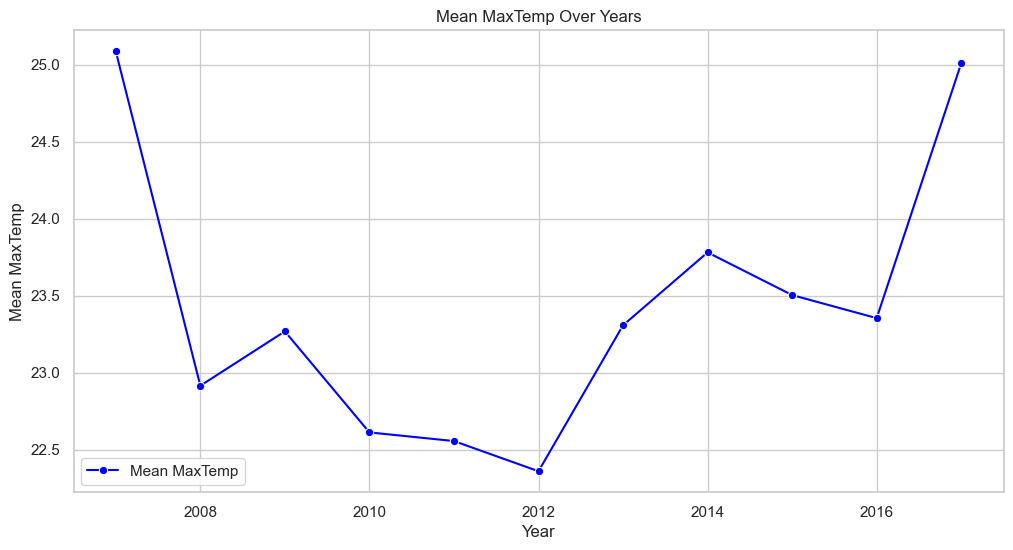

In [25]:
# visualisasi data rata-rata MaxTemp pertahun
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='MaxTemp', data=grouped_year, label='Mean MaxTemp', color='blue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Mean MaxTemp Over Years')
plt.xlabel('Year')
plt.ylabel('Mean MaxTemp')
plt.legend()
plt.show()

Visualisasi diatas menyiratkan bahwa rata-rata suhu maksimum harian (MaxTemp) mencapai titik terendahnya pada tahun 2012 dalam rentang waktu 2008 hingga 2016. Hal ini menunjukkan variasi suhu maksimum harian yang signifikan selama periode tersebut, dengan tahun 2012 mencatat rata-rata MaxTemp yang lebih rendah dibandingkan dengan tahun-tahun lainnya. Adanya fluktuasi tersebut dapat disebabkan oleh berbagai faktor seperti perubahan iklim, fenomena alam, atau variabel lain yang memengaruhi suhu.

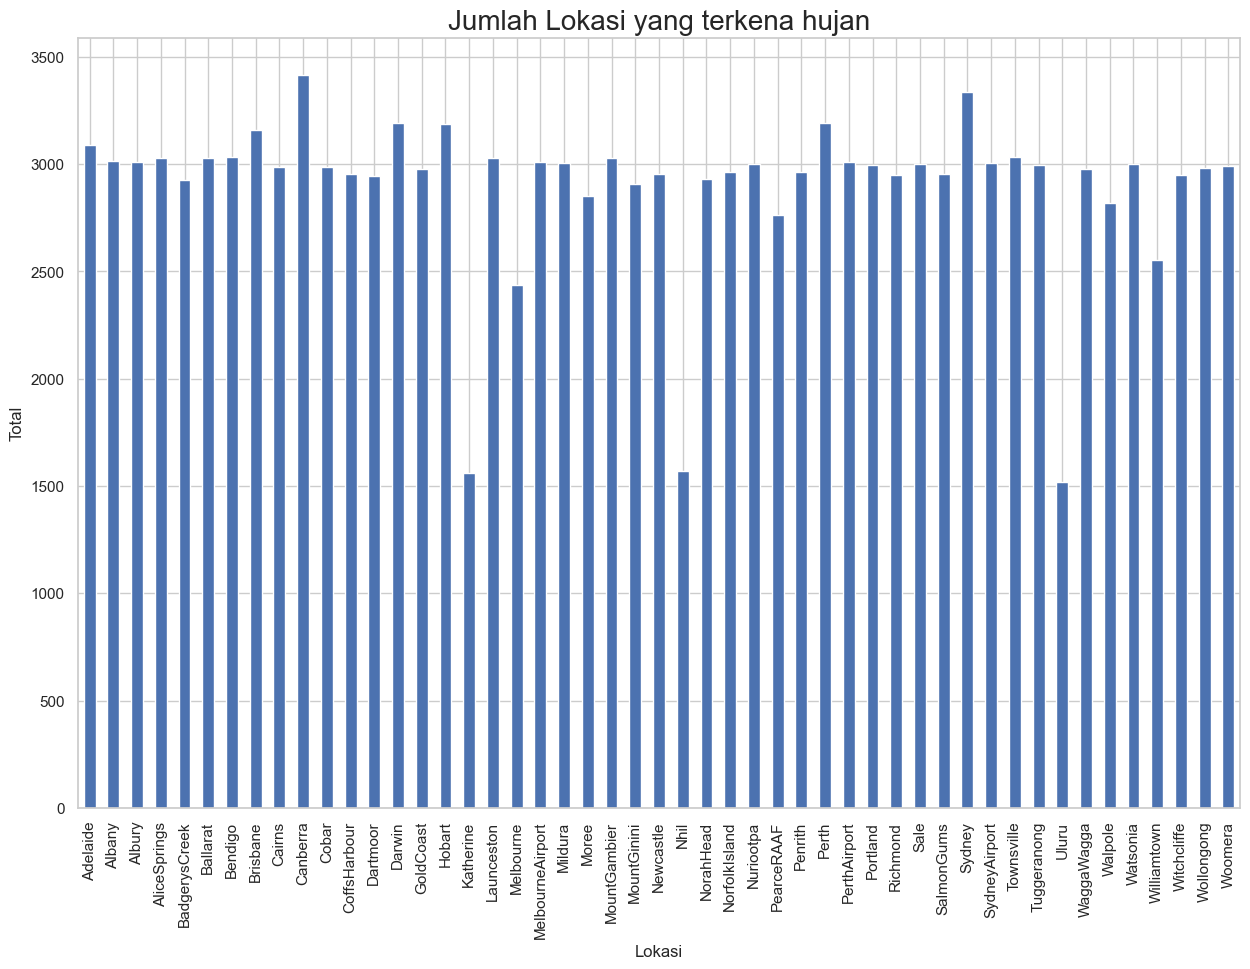

In [26]:
# Visualisasi Jumlah lokasi yang terkena hujan
sort_day= df['Location'].value_counts().sort_index()
plt.figure(figsize=(15, 10))
sort_day.plot.bar()
plt.title("Jumlah Lokasi yang terkena hujan", size=20)
plt.xlabel("Lokasi")
plt.ylabel("Total")
plt.show()

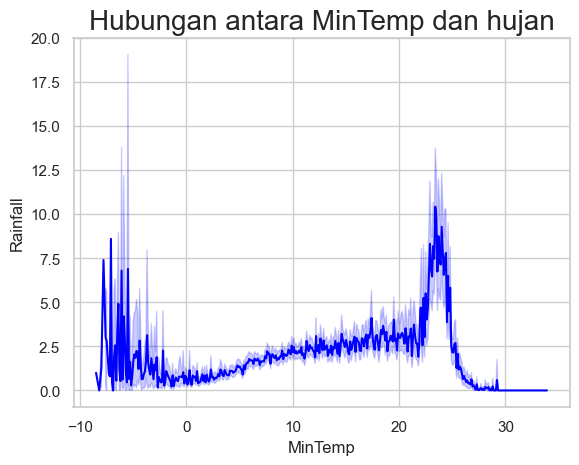

In [27]:
# visualisasi Hubungan antara minimum temperature dan hujan
sns.lineplot(data=df,x='MinTemp',y='Rainfall',color='Blue')
plt.title("Hubungan antara MinTemp dan hujan", size=20)
plt.show()

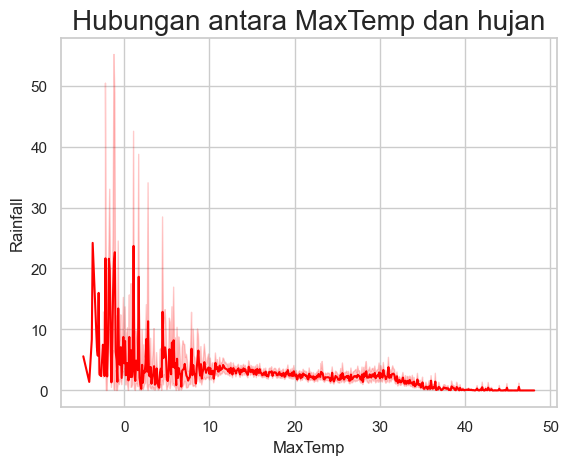

In [28]:
# visualisasi Hubungan antara maksimum temperature dan hujan
sns.lineplot(data=df,x='MaxTemp',y='Rainfall',color='Red')
plt.title("Hubungan antara MaxTemp dan hujan", size=20)
plt.show()

dari visualisasi diatas, dapat dikatakan temperature memiliki keterkaitan dengan curah hujan

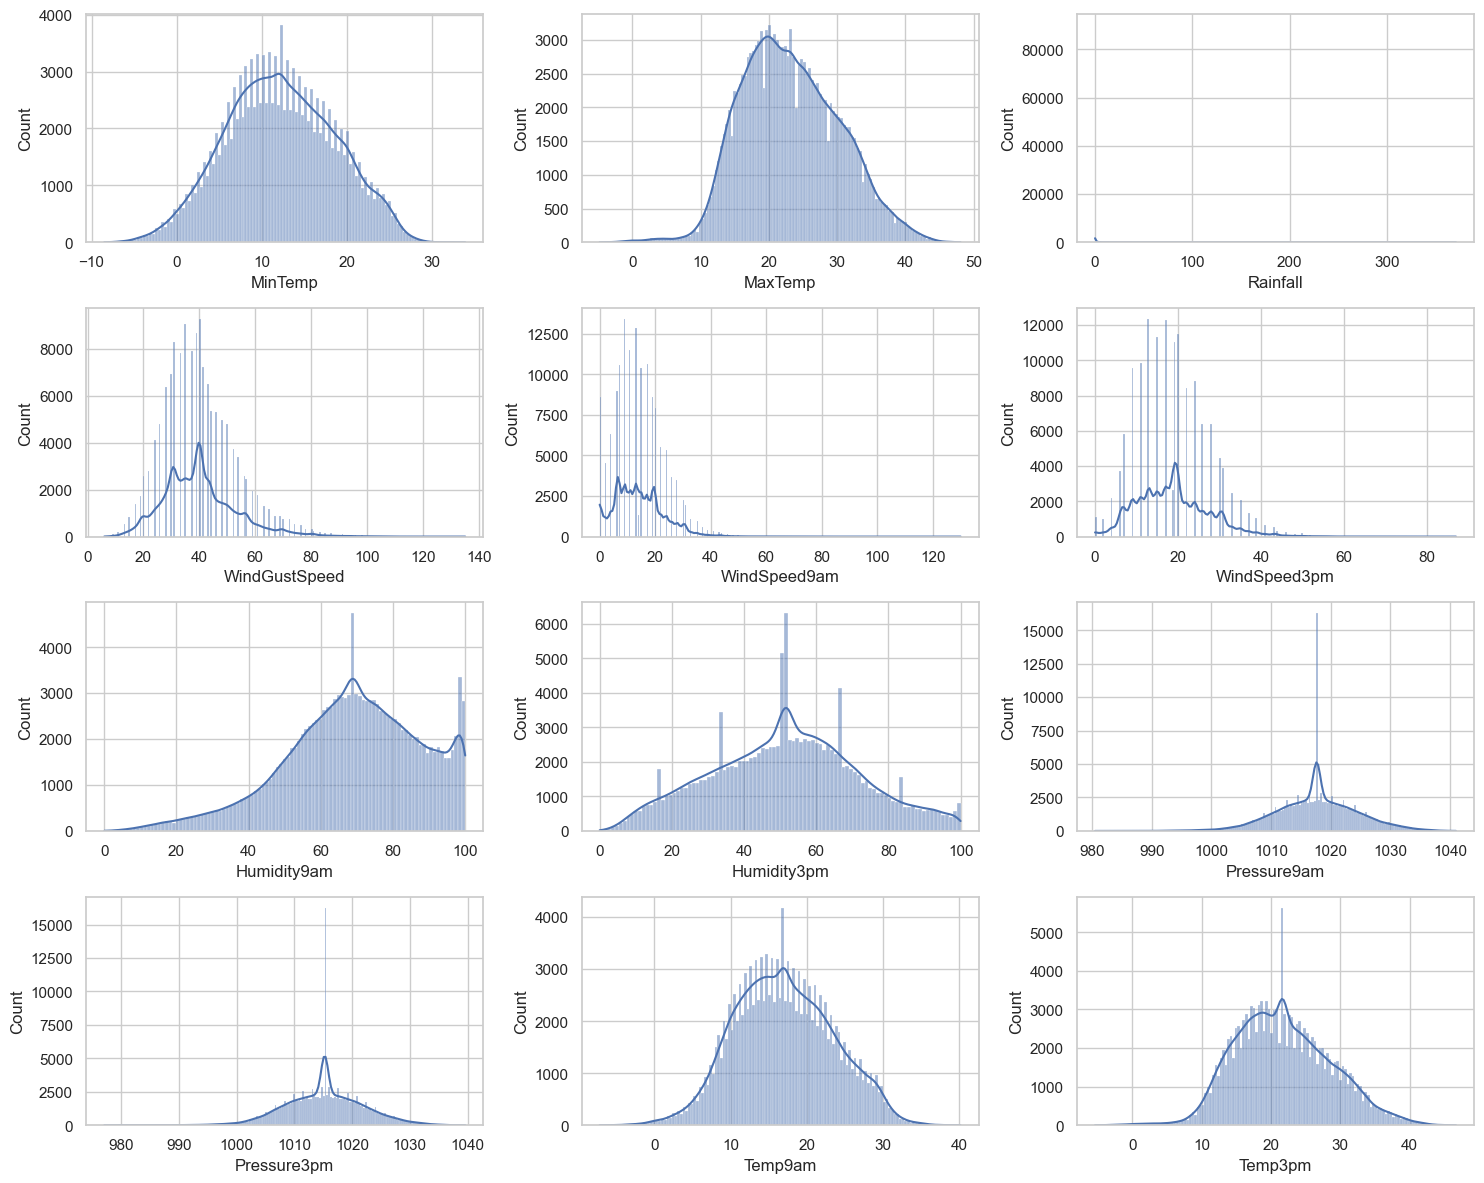

In [29]:
# Histogram untuk distribusi variabel
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for i, variable in enumerate(variables):
    sns.histplot(df[variable], kde=True, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

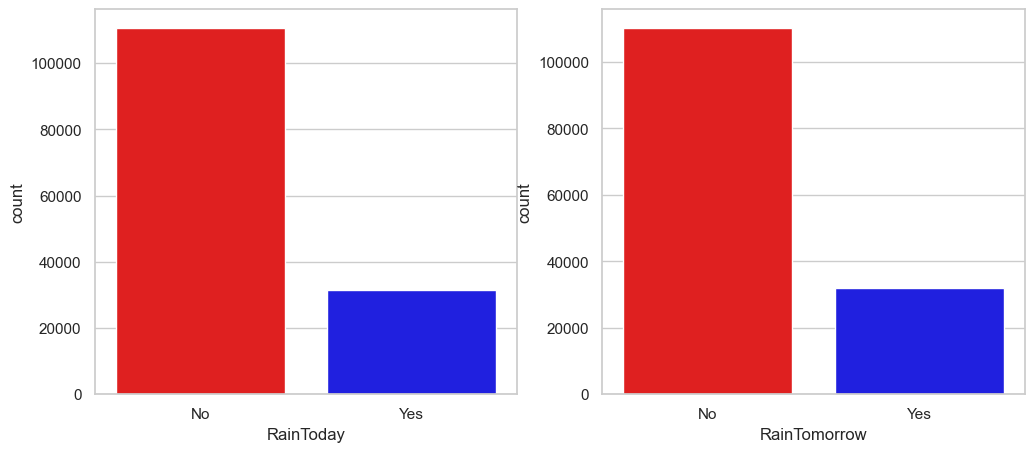

In [54]:
#  chart atau bar plot untuk RainToday dan RainTomorrow
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='RainToday', data=df, ax=axes[0], palette=['red', 'blue'])
sns.countplot(x='RainTomorrow', data=df, ax=axes[1], palette=['red', 'blue'])
plt.show()

C:\Users\fakhr\AppData\Local\Temp\ipykernel_18332\2799817322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


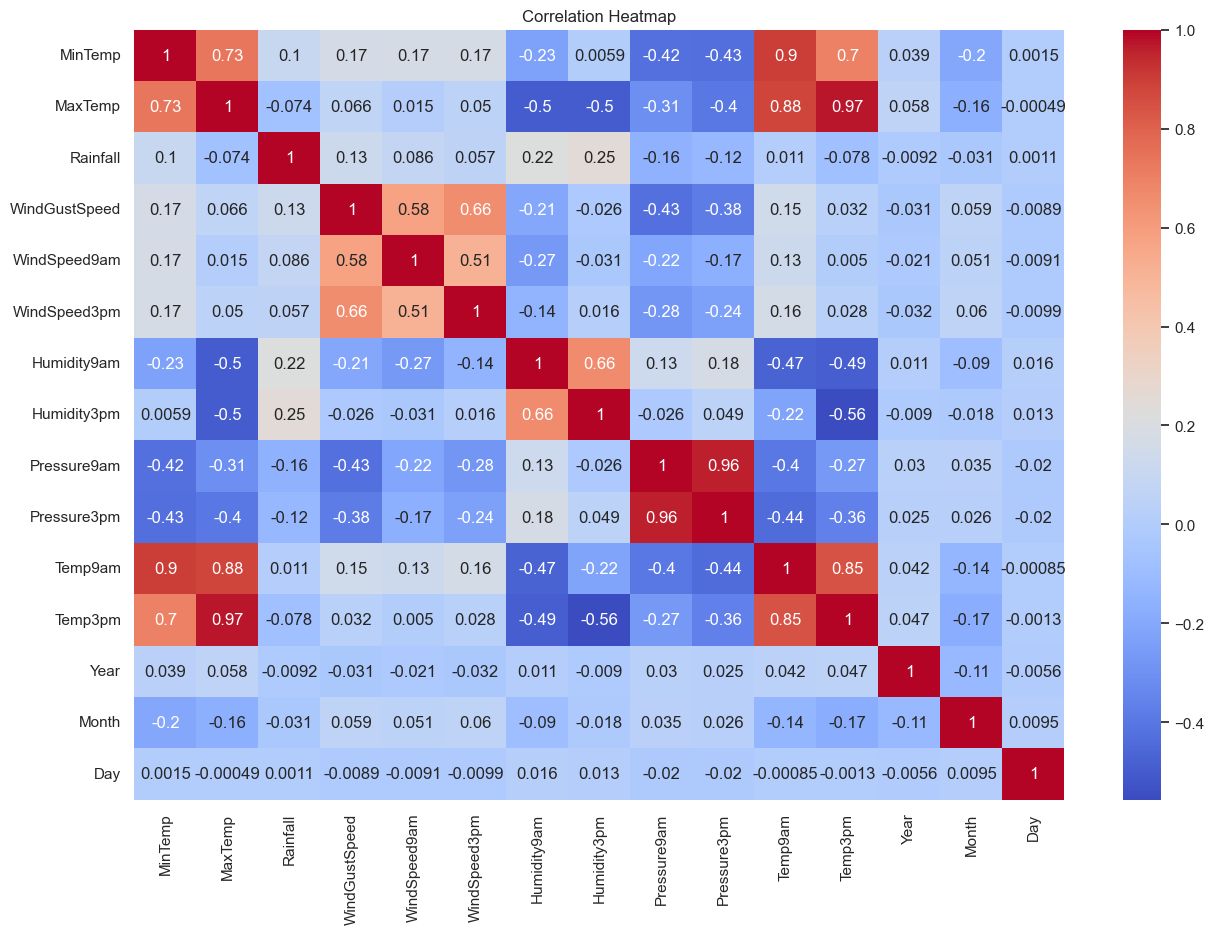

In [31]:
# Heatmap untuk korelasi antarvariabel
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## F. Data Preprocessing



### F.1 Handling Outlier

outlier adalah data yang memiliki karakteristik yang berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai ekstrim baik untuk variabel tunggal atau variabel kombinasi.
dan ini akan sangat berpengaruh pada hasil analisa dan juga kualitasi model machine learning, maka dari itu outlier harus ditangani terlebih dahulu.

In [32]:
def winsorize_numerical_outliers(df):
    df_winsorized = df.copy()
    for column in numerical_df:
        # Winsorize 10% nilai terendah dan 10% nilai tertinggi
        df_winsorized[column] = winsorize(df[column], limits=[0.10, 0.05])
    
    return df_winsorized

df_clean = winsorize_numerical_outliers(df)

In [33]:
df.shape

(142193, 21)

In [34]:
df_clean.shape

(142193, 21)

### F.2 Encoding

Encoding dilakukan untuk mengelompokan data yang bertujuan untuk memastikan bahwa data dapat diolah dan dianalisis dengan benar berdasarkan data typenya.


In [35]:
# Use Label Encoder do Encode data
la = LabelEncoder()
encode_column = []
for column in df_clean.columns:
    if df_clean[column].dtype == 'object':
        encode_column.append(column)
encode_column

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [36]:
for column in encode_column:
    print(column)
    df_clean[column] = la.fit_transform(df_clean[column])

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


### F.3 Preparation Training Data 

sebelum masuk kedalam train-dev-test data , perlu dilakukan persiapan data

In [37]:
# mendeklarsikan kolom fitur dan kolom target
X = df_clean.drop(columns='RainTomorrow')
y = df_clean['RainTomorrow']

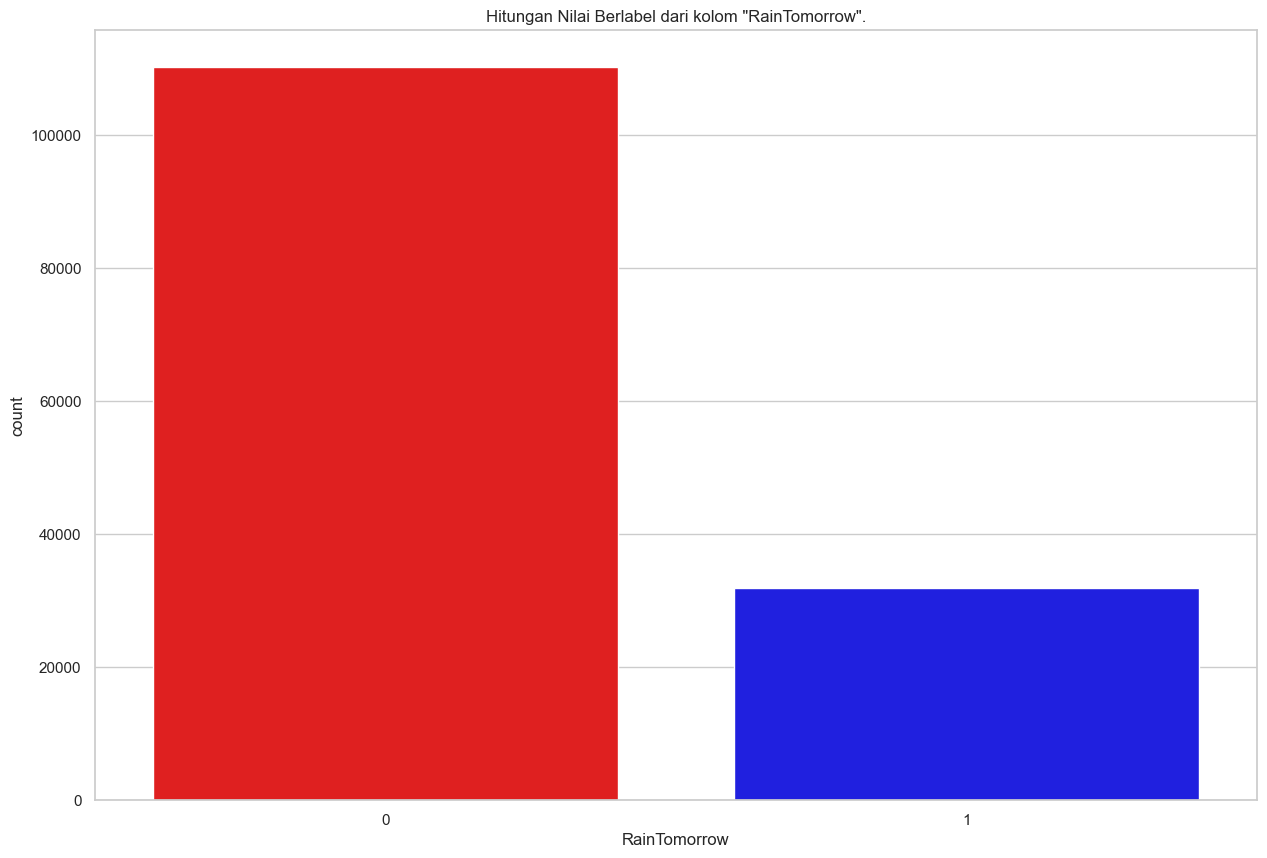

In [55]:
# melihat plot lebeled data
plt.figure(figsize=(15, 10))
sns.countplot(x=df_clean['RainTomorrow'], palette=['red', 'blue'])
plt.title('Hitungan Nilai Berlabel dari kolom "RainTomorrow".')
plt.show()

Setelah menganalisis plot kolom "RainTomorrow", terlihat bahwa dataset ini mengalami ketidakseimbangan (imbalanced). Jumlah data yang memiliki label '0' (tidak hujan) jauh lebih banyak dibandingkan dengan data yang memiliki label '1' (hujan). Menggunakan dataset ini secara langsung dapat menghasilkan performa prediksi yang kurang baik, terutama dalam mengidentifikasi data yang berlabel '1' karena kurangnya representasi.

Oleh karena itu, untuk mengatasi permasalahan ketidakseimbangan ini, kita akan menggunakan metode yang dikenal sebagai SMOTE (Synthetic Minority Over-Sampling Technique). SMOTE digunakan untuk menghasilkan data sintetis pada kelas minoritas, sehingga meningkatkan jumlah sampel pada kelas yang lebih sedikit sehingga proporsi kelas menjadi lebih seimbang.

In [39]:
X, y = SMOTE().fit_resample(X, y)

In [40]:
#cek data seimbang
y.value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

#### Train-Dev-Test
training data adalah bagian kunci dalam pengembangan model machine learning. Tujuan utama dari pelatihan data adalah untuk memberikan model informasi dan pola dari data yang diberikan sehingga model dapat belajar dan membuat prediksi atau keputusan yang akurat pada data baru yang belum pernah dilihat sebelumnya.

dalam develop project ini dilakukan metode self-training, self-training sediri mengacu pada pendekatan di mana model belajar dari data yang telah dihasilkan oleh model itu sendiri. 

metode persebaran data untuk self-training pada development model ini adalah menggunakan
pembagian klasik (80:20)

In [41]:
# membagi data 80 banding 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## G.  Pendefinisian Model

dalam project ini model yang akan dipakai adalah Logistic Regression dan SVM sesuai dengan objektif dari project ini.

Penjelasan :

- selain karena objektif dari instruksi Final Project 1, pemilihan arsitektur model Logistic Regression dan SVM didasari dari objektif yang ingin digapai yaitu adalah prediksi besok hujan atau tidak
- Model Logistic Regression dan SVM sering dipilih karena kemampuannya yang mudah diinterpretasikan dan efisien secara komputasi. Dengan koefisien yang dapat diartikan sebagai pengaruh relatif dari setiap fitur terhadap probabilitas kejadian kelas tertentu, Logistic Regression cocok untuk masalah klasifikasi biner dan tidak terlalu sensitif terhadap outlier. 


In [42]:
# Define both models for classification
lr_model = LogisticRegression(max_iter=10000)
svm_model = LinearSVC(random_state=0, tol=1e-5)


## H. Pelatihan Model

pelatihan model dilakukan oleh mesin menggunakan model yang sudah ditentukan yaitu model Logistic Regression dan SVM

In [43]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
svm_model.fit(X_train, y_train)

c:\Users\fakhr\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fakhr\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## I. Evaluasi Model

Evaluasi model menunjukan performa model Logistic Regression dan SVM melalui skor akurasi.

In [45]:
lr_predictions = lr_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [46]:
# Evaluate the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Model Accuracy: {lr_accuracy}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

Logistic Regression Model Accuracy: 0.7714324563192603
Logistic Regression Confusion Matrix:
[[17375  4619]
 [ 5467 16666]]


In [47]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy}")
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Model Accuracy: 0.6140911460103792
SVM Confusion Matrix:
[[21631   363]
 [16666  5467]]


## J. Model Inference


Model inference dilakukan dengan data berbeda
,contoh pengaplikasian sederhananya dilampirkan juga sebagai berikut:

In [48]:
Inference_data = X_test.sample(10)
Inference_data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
156968,26,20.447425,23.319072,2.050519,12,53.206188,9,7,22.412375,29.809281,78.984531,73.381437,1013.235050,1012.922166,21.503094,22.357216,0,2013,4,18
183527,5,20.467944,26.549079,1.418874,1,44.188652,2,1,13.604983,22.018914,71.282999,70.981086,1016.285320,1011.175461,19.052788,24.960427,0,2010,2,5
112778,29,12.600000,18.600000,6.600000,13,54.000000,3,13,22.000000,26.000000,87.000000,69.000000,1016.800000,1015.800000,15.700000,17.300000,1,2011,8,8
64907,19,9.300000,26.600000,0.000000,10,39.000000,7,8,15.000000,24.000000,54.000000,35.000000,1015.600000,1014.600000,17.300000,24.100000,0,2015,3,11
11161,11,5.400000,19.300000,0.000000,6,24.000000,14,0,7.000000,9.000000,73.000000,54.000000,1017.300000,1013.500000,13.600000,18.700000,0,2015,7,6
37267,42,19.600000,31.500000,10.200000,13,54.000000,8,13,13.000000,28.000000,68.000000,27.000000,1009.200000,1006.800000,23.300000,30.900000,1,2013,1,29
159209,8,23.000000,29.700000,5.125436,8,31.650871,8,9,14.952614,17.650871,81.698257,80.023693,1010.507108,1007.660349,26.992892,28.165087,1,2010,3,13
174531,8,19.490796,27.032896,1.121050,9,35.000000,10,2,13.000000,22.000000,81.671042,56.526333,1019.971042,1018.131567,22.151321,25.878950,0,2014,6,24
59158,6,15.900000,27.700000,0.000000,11,39.000000,12,11,13.000000,24.000000,44.000000,45.000000,1011.200000,1010.900000,22.500000,23.400000,0,2015,11,20
204882,8,20.697040,25.662160,0.700640,9,46.059200,10,9,20.000000,18.940800,84.029600,77.852000,1019.162160,1016.150320,22.123680,23.732560,0,2015,5,16


In [49]:
Lr_inference =  lr_model.predict(Inference_data)
SVC_inference =  svm_model.predict(Inference_data)

In [50]:
Lr_inference

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [51]:
SVC_inference

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## K. Pengambilan Kesimpulan

### Berikut adalah potongan dari sesi Pengenalan project
- Objective yang ingin dicapai :
    - Memahami konsep Logistic Regression dan Support Vector Machine (SVM).
    - Mampu mempersiapkan data untuk digunakan pada model Logistic Regression dan SVM.
    - Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.


- Hasil yang diharapkan :
    - Model dapat memprediksi perkiraan hujan menggunakan konsep Logistic Regression dan Support Vector Machine (SVM).


### Kesimpulan

- Berdasarkan objektif yang ingin dicapai:
    - Kelompok 4 KS18 berhasil memahami konsep machine learning dari regression berupa logistic Regression dan SVM : Model Logistic Regression cocok untuk masalah klasifikasi biner dan tidak terlalu sensitif terhadap outlier begitu juga SVM. dan cocok digunakan unutk mempredikisi hujan esok hari.
    - Dengan proses yang sudah dilakukan diatas membuktikan kelompok 4 KS18 Mampu mempersiapkan data untuk digunakan pada model Logistic Regression dan SVM.
    - Model Linear Regression yang telah dibuat oleh Kelompok 4 KS18 dapat digunakan untuk membuat prediksi hujan esok hari berdasarkan dataset yang diberikan.

- Berdasarkan hasil yang diharapkan:
    - dengan model machine learning yang telah didevelop hasil yang diharapkan belum memenuhi keinginan kami dikarenakan akurasi belum menyentuh angka yang optimal(terlebih lagi untuk model SVM yang hanya menyentuh angka 50%). selanjutnya kami akan terus belajar dan memperbaiki kesalahan kesalahan yang dilakukan pada project kali ini

In [52]:
# Export model dengan ekstensi pickle
joblib.dump(lr_model, 'LogisticRegModel.pkl')
joblib.dump(svm_model, 'SVMmodel.pkl')

['SVMmodel.pkl']